In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')

# READING **DATA**

In [2]:
df=pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [4]:
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)


Dataset Shape: (29531, 16)

Column Data Types:
 City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,16471.0,46.082137,23.769100,0.040000,25.560000,43.890000,67.450578,132.570000
PM10,16471.0,92.209075,37.110924,5.820000,59.550000,110.120000,118.127103,185.480000
NO,16471.0,10.743781,6.932090,0.060000,4.960000,9.380000,17.574730,35.170000
NO2,16471.0,21.466034,11.277044,0.010000,11.495000,21.880000,28.560659,54.120000
NOx,16471.0,22.071316,12.751768,0.000000,11.660000,22.570000,32.309123,62.060000
NH3,16471.0,17.860024,9.099031,0.010000,10.040000,22.510000,23.483476,42.520000
CO,16471.0,0.901269,0.692145,0.000000,0.420000,0.770000,1.200000,2.760000
SO2,16471.0,9.649922,5.172892,0.410000,5.450000,8.790000,14.531977,27.910000
O3,16471.0,30.749414,13.850102,0.010000,20.325000,33.910000,36.840000,67.410000
Benzene,16471.0,1.713868,1.643698,0.000000,0.160000,1.210000,3.280840,7.910000


In [6]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [7]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


# DATA **PREPROCESSING**

In [8]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


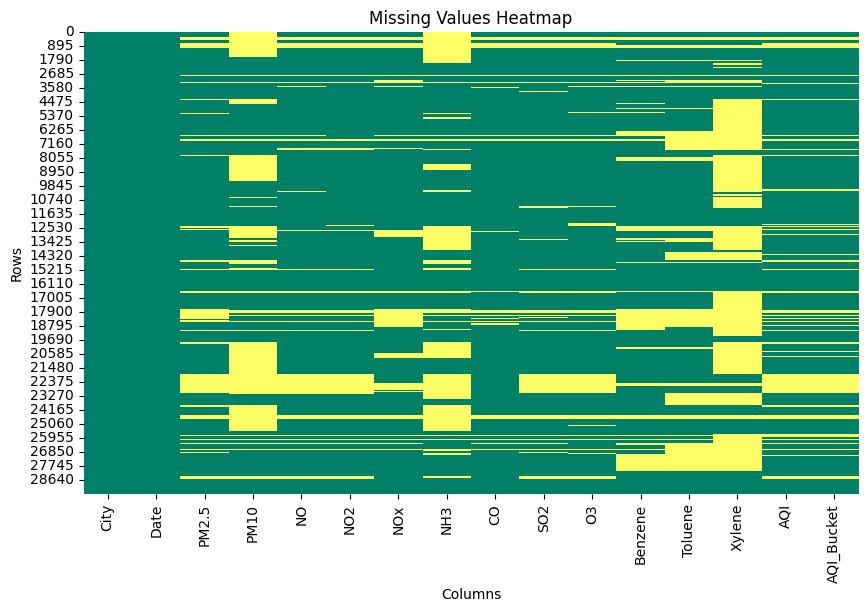

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='summer')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values Heatmap')
plt.show()


In [10]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Values Percentage:\n", missing_percentage)


Missing Values:
 City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

Missing Values Percentage:
 City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64


In [11]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.set_index('Date', inplace=True)
    print("\nDate column converted to datetime and set as index")


Date column converted to datetime and set as index


In [12]:
df = df.dropna(thresh=len(df) * 0.6, axis=1)
print("\nColumns with more than 60% missing values removed:\n", df.columns)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


print("\nMissing Values After Filling:\n", df.isnull().sum())



Columns with more than 60% missing values removed:
 Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI', 'AQI_Bucket'],
      dtype='object')

Missing Values After Filling:
 City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64


In [13]:

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
data_no_outliers = df[(z_scores < 3).all(axis=1)]

print("\nShape of Original Dataset:", df.shape)
print("Shape of Dataset After Removing Outliers:", data_no_outliers.shape)
print("Number of Outliers Removed:", df.shape[0] - data_no_outliers.shape[0])



Shape of Original Dataset: (29531, 14)
Shape of Dataset After Removing Outliers: (25860, 14)
Number of Outliers Removed: 3671


In [14]:

df['NO2_NO_ratio'] = df['NO2'] / df['NO']
df['PM2.5_PM10_ratio'] = df['PM2.5'] / df['PM10']
df['CO_SO2_ratio'] = df['CO'] / df['SO2']

df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['NO2_NO_ratio', 'PM2.5_PM10_ratio', 'CO_SO2_ratio'])


print("NO2/NO Ratio:\n", df['NO2_NO_ratio'])
print("\nPM2.5/PM10 Ratio:\n", df['PM2.5_PM10_ratio'])
print("\nCO/SO2 Ratio:\n", df['CO_SO2_ratio'])


NO2/NO Ratio:
 Date
2015-01-01    19.804348
2015-01-02    16.175258
2015-01-03     1.109195
2015-01-04    10.870588
2015-01-05     0.969231
                ...    
2020-06-27     3.263021
2020-06-28     7.619883
2020-06-29     8.559420
2020-06-30     7.224691
2020-07-01    67.125000
Name: NO2_NO_ratio, Length: 29531, dtype: float64

PM2.5/PM10 Ratio:
 Date
2015-01-01    0.571000
2015-01-02    0.571000
2015-01-03    0.571000
2015-01-04    0.571000
2015-01-05    0.571000
                ...   
2020-06-27    0.294857
2020-06-28    0.329059
2020-06-29    0.348547
2020-06-30    0.333000
2020-07-01    0.227273
Name: PM2.5_PM10_ratio, Length: 29531, dtype: float64

CO/SO2 Ratio:
 Date
2015-01-01    0.033285
2015-01-02    0.039511
2015-01-03    0.598555
2015-01-04    0.091447
2015-01-05    0.561912
                ...   
2020-06-27    0.054971
2020-06-28    0.040881
2020-06-29    0.057007
2020-06-30    0.052846
2020-07-01    0.280952
Name: CO_SO2_ratio, Length: 29531, dtype: float64


In [15]:

df['Month'] = df.index.month
df['Year'] = df.index.year


print("\nNew Columns After Feature Engineering:\n", df[['Month', 'Year']].head())



New Columns After Feature Engineering:
             Month  Year
Date                   
2015-01-01      1  2015
2015-01-02      1  2015
2015-01-03      1  2015
2015-01-04      1  2015
2015-01-05      1  2015


# **EDA**


Skewness of Numerical Features:
 PM2.5       3.667334
PM10        2.601537
NO          4.142282
NO2         2.629166
NOx         2.773814
NH3         5.064139
CO          9.204519
SO2         4.379163
O3          1.431059
Benzene    23.675863
Toluene    13.674685
AQI         3.702663
dtype: float64


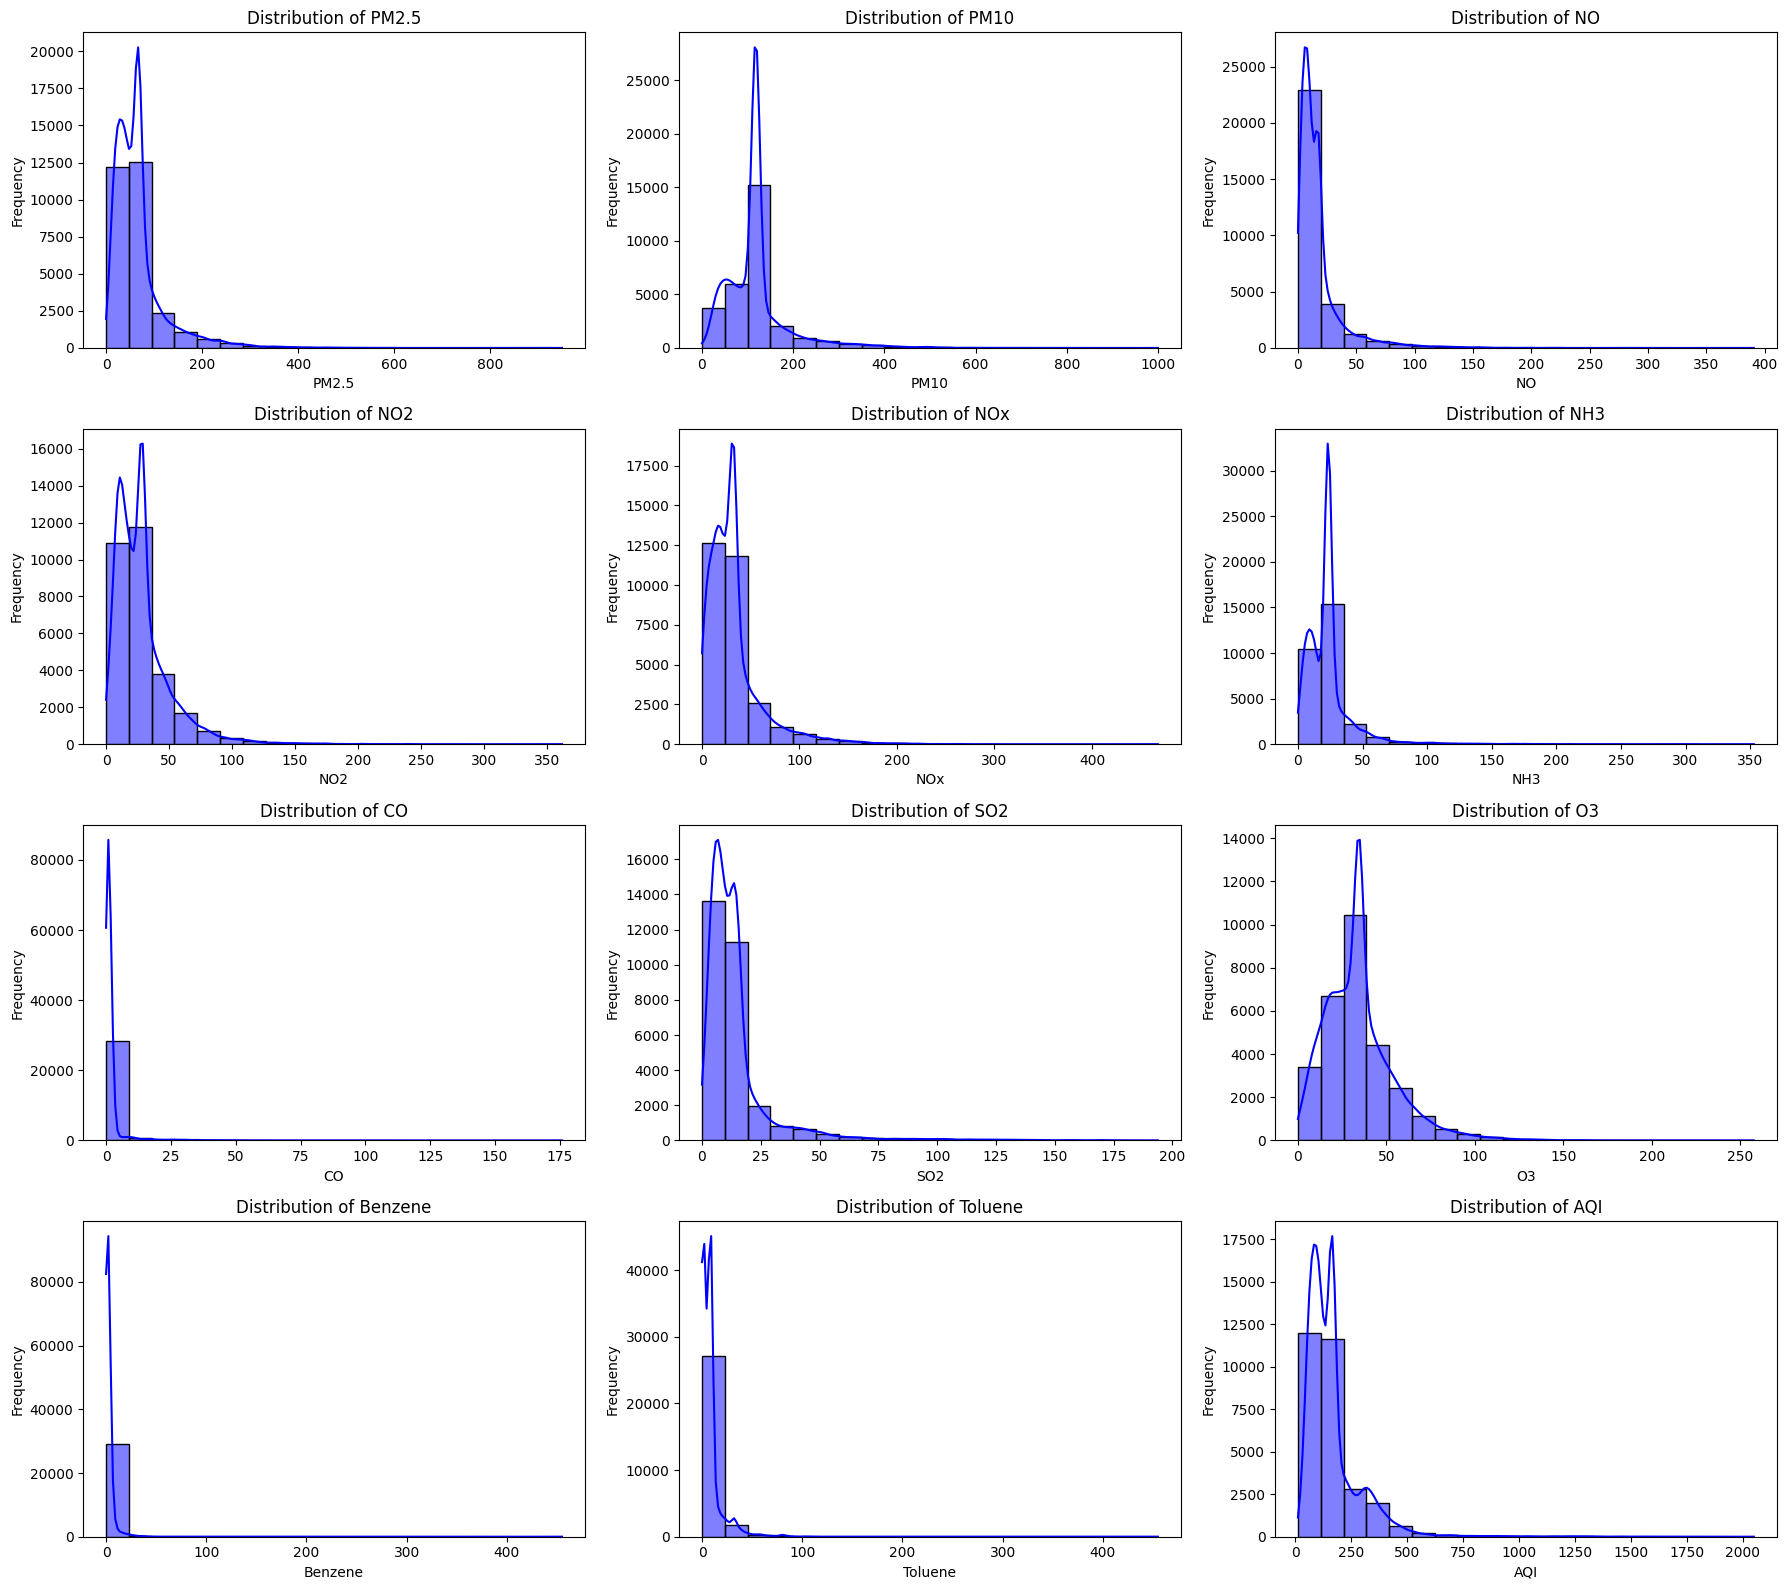

In [16]:


from scipy.stats import skew

skewed_features = df[numerical_cols].apply(lambda x: skew(x.dropna()))
print("\nSkewness of Numerical Features:\n", skewed_features)

num_plots = len(numerical_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)
plt.figure(figsize=(18, rows * 4))

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[column].dropna(), kde=True, color="blue", palette="crest", bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


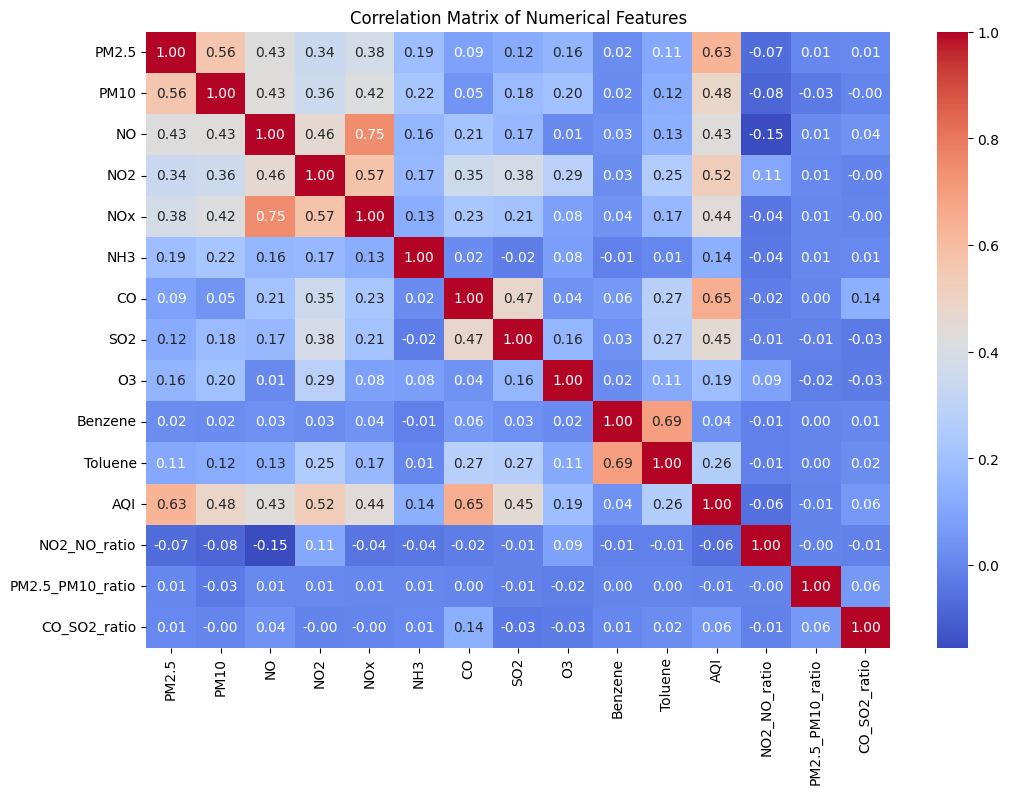

In [17]:


numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

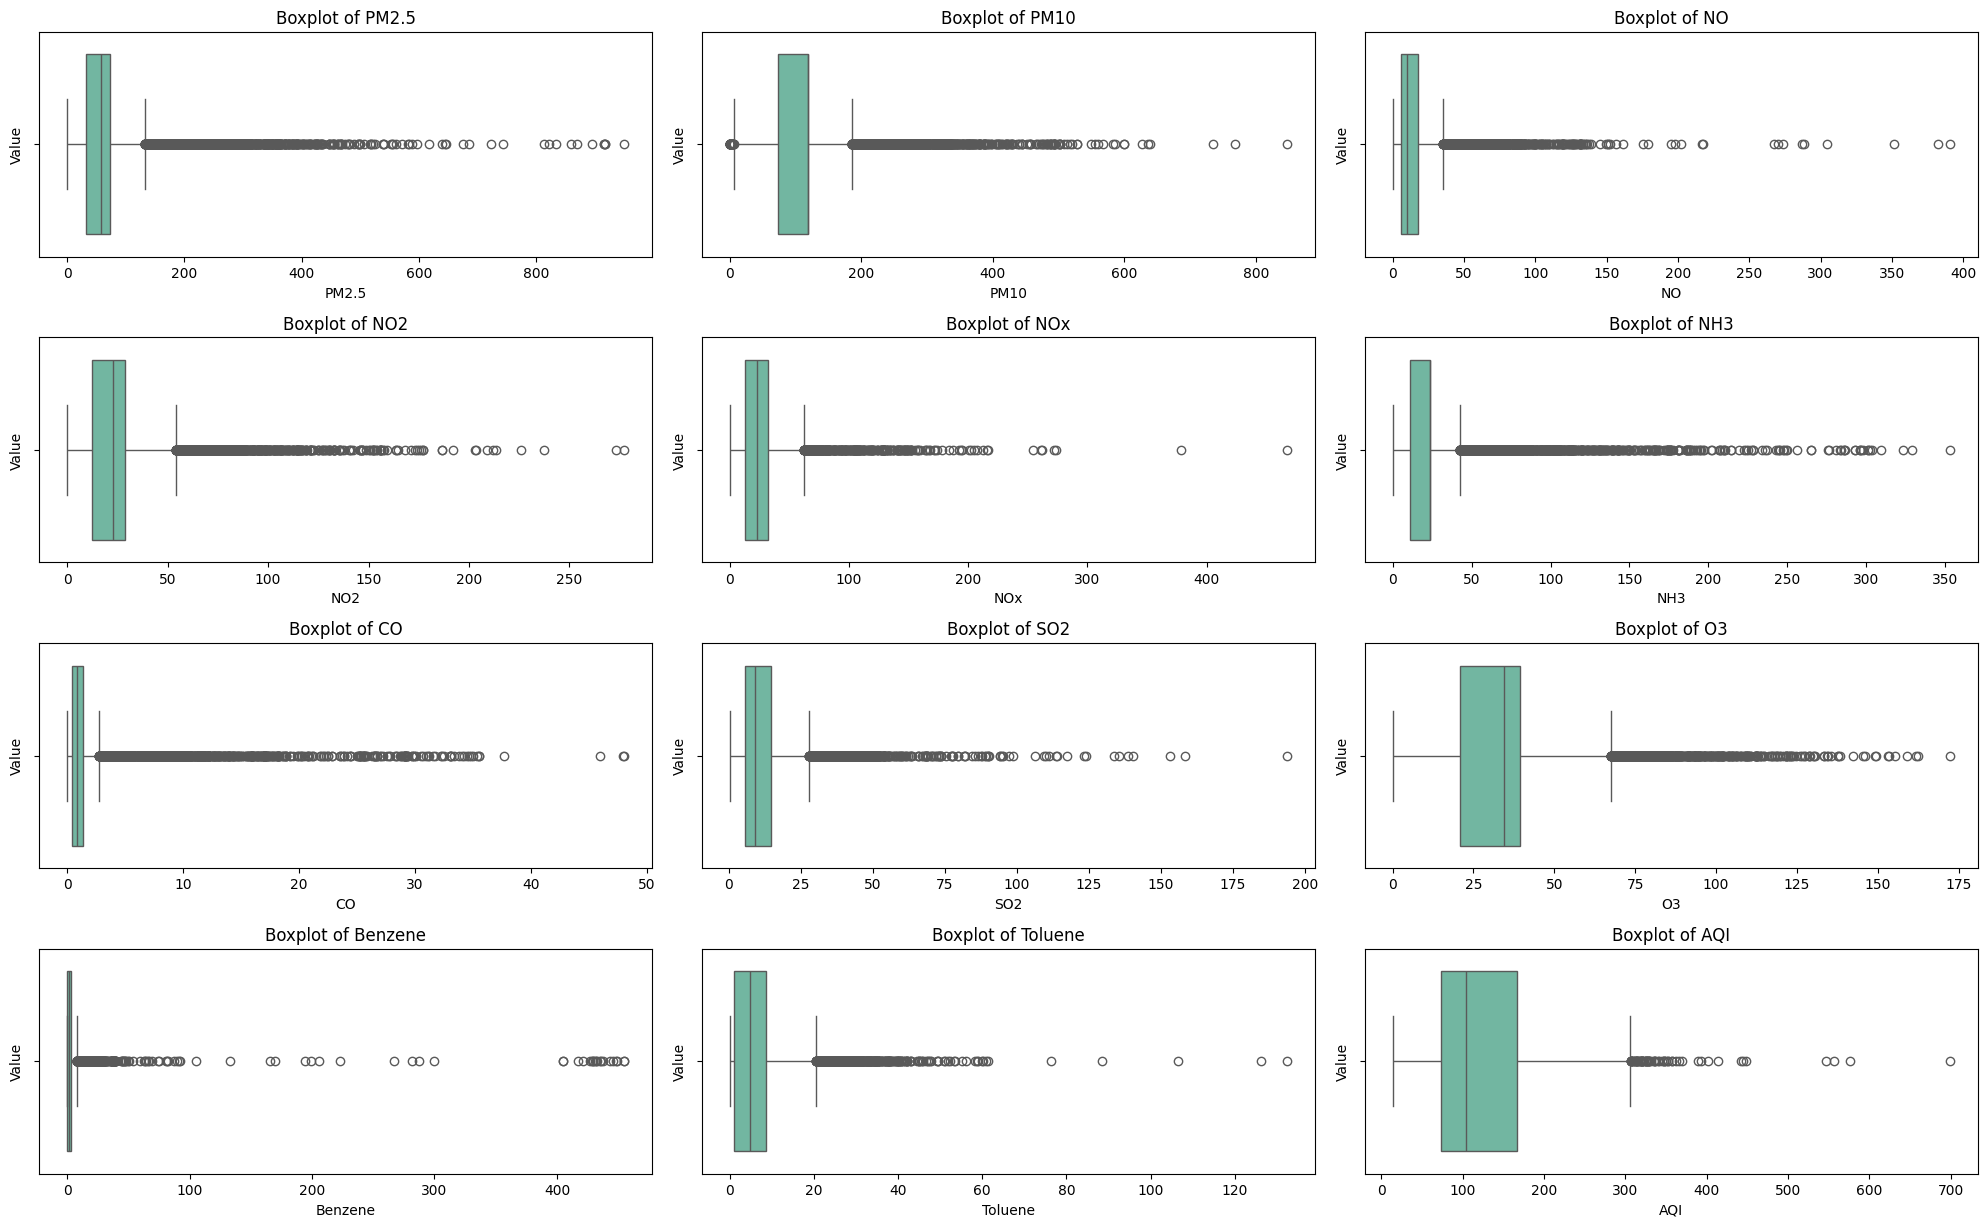

In [18]:

cols_per_row = 3
plt.figure(figsize=(20, 15))

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(5, cols_per_row, i)
    sns.boxplot(x=df[column], palette="Set2")
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

plt.tight_layout()
plt.show()




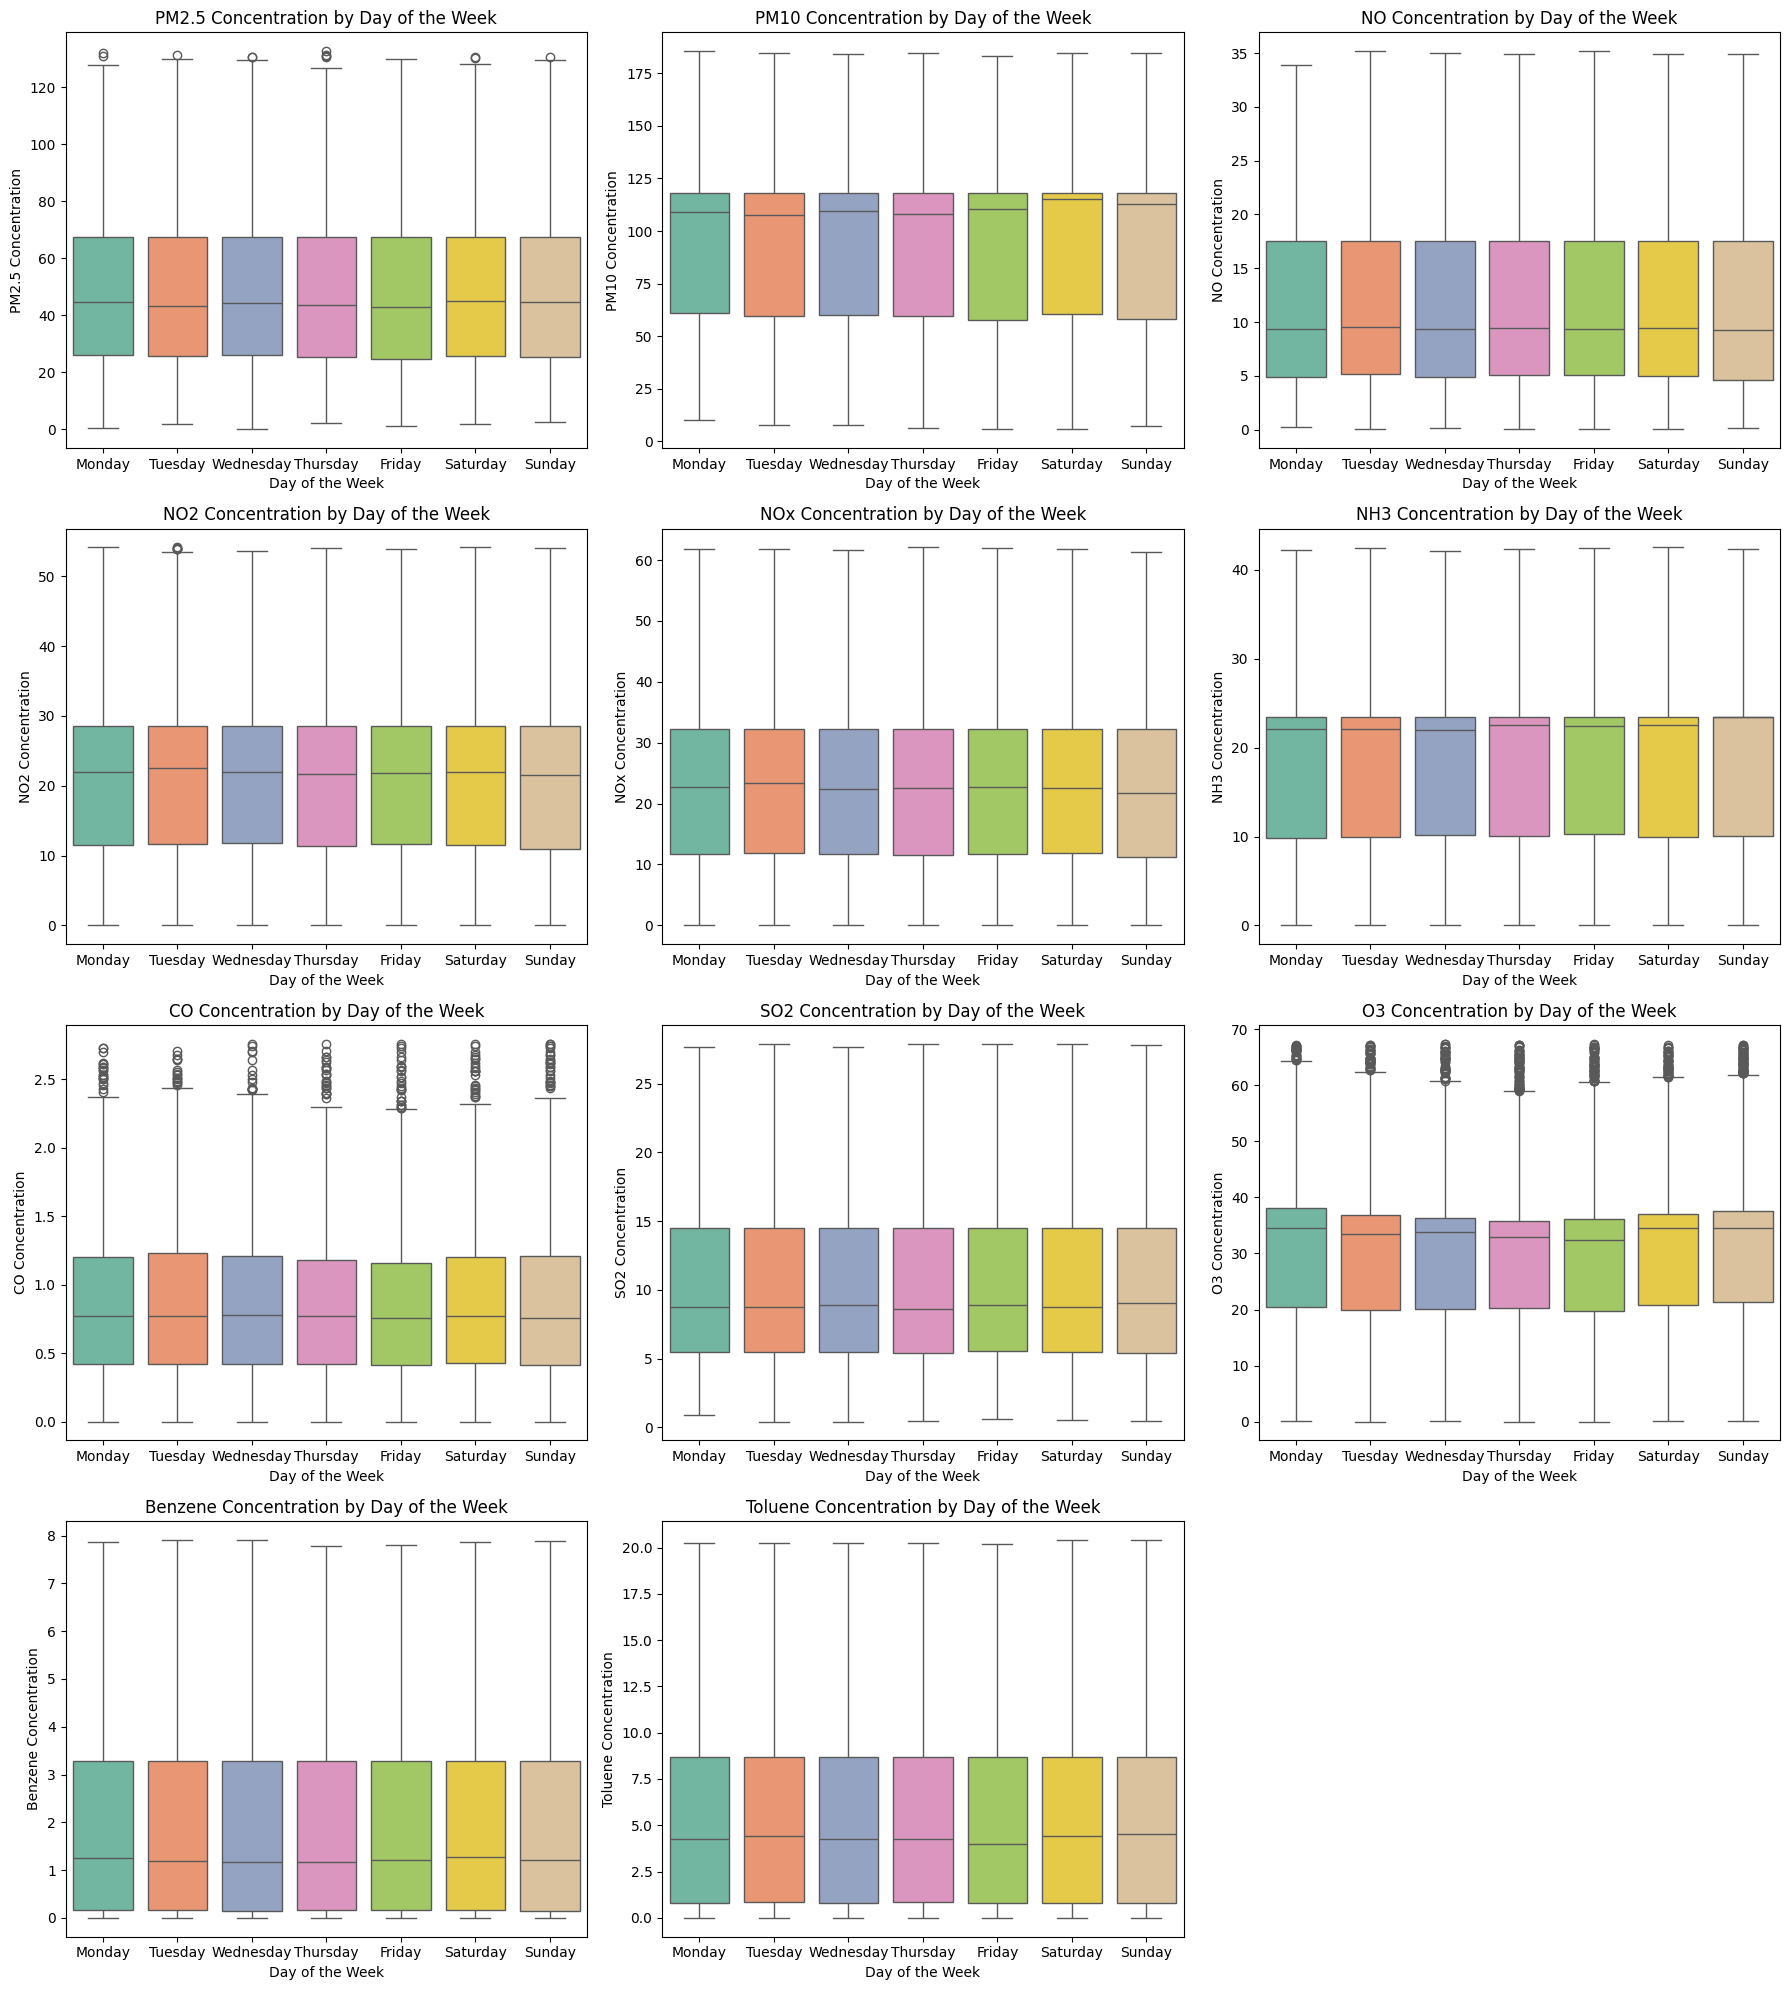

In [19]:

df['DayOfWeek'] = df.index.day_name()


factors = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

num_plots = len(factors)
rows = (num_plots // 3) + (num_plots % 3 > 0)

plt.figure(figsize=(18, rows * 5))


for i, factor in enumerate(factors, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(data=df, x='DayOfWeek', y=factor, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="Set2")
    plt.title(f"{factor} Concentration by Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel(f"{factor} Concentration")

plt.tight_layout()
plt.show()

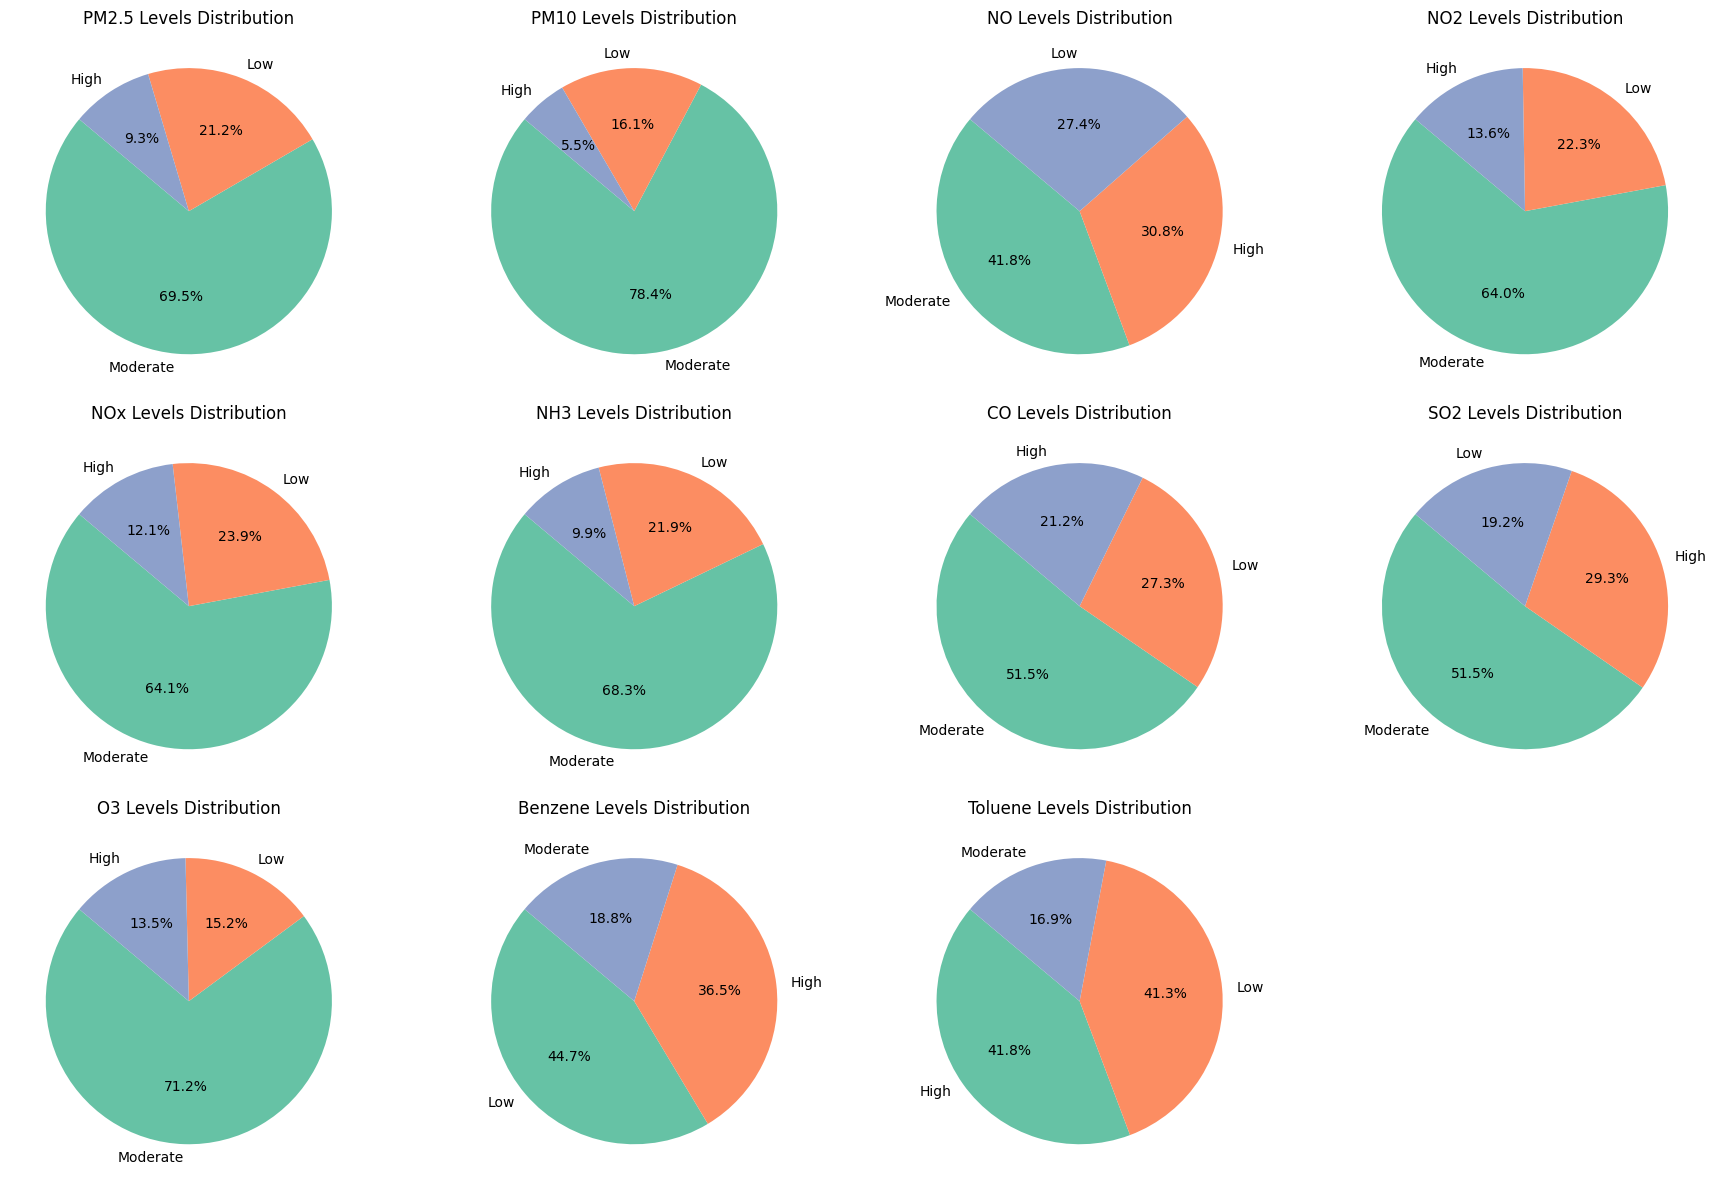

In [20]:


factors = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

plt.figure(figsize=(18, 12))

for i, factor in enumerate(factors, 1):

    mean_value = df[factor].mean()

    conditions = [
        (df[factor] < 0.5 * mean_value),
        (df[factor] >= 0.5 * mean_value) & (df[factor] <= 1.5 * mean_value),
        (df[factor] > 1.5 * mean_value)
    ]
    categories = ['Low', 'Moderate', 'High']

    df[f'{factor}_Category'] = np.select(conditions, categories)

    category_counts = df[f'{factor}_Category'].value_counts()

    plt.subplot(3, 4, i)
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140,
            colors=sns.color_palette("Set2", 3))
    plt.title(f"{factor} Levels Distribution")

plt.tight_layout()
plt.show()


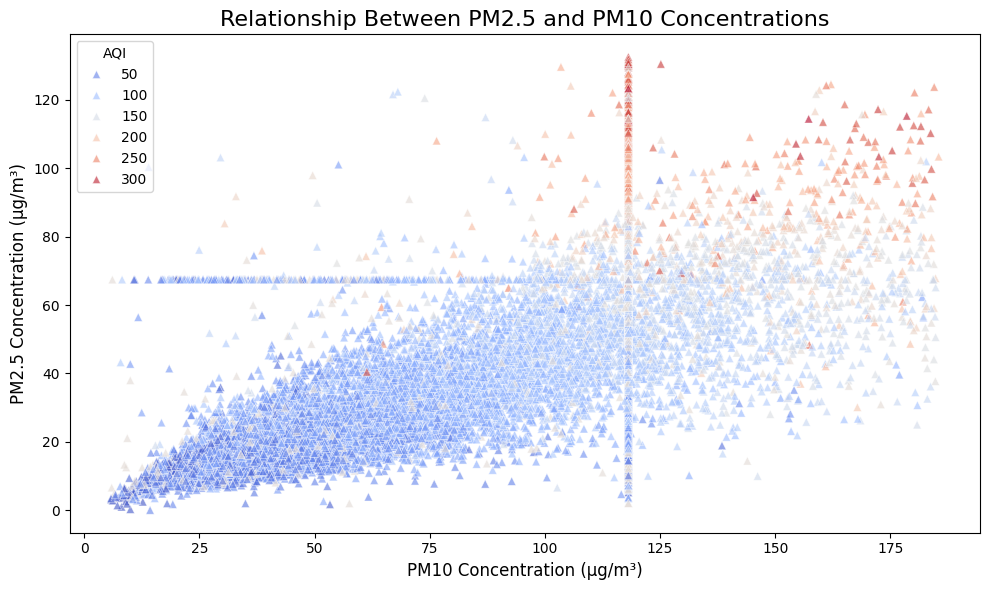

In [21]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PM10', y='PM2.5', alpha=0.6, hue='AQI', palette='coolwarm', marker='^')
plt.title("Relationship Between PM2.5 and PM10 Concentrations", fontsize=16)
plt.xlabel("PM10 Concentration (µg/m³)", fontsize=12)
plt.ylabel("PM2.5 Concentration (µg/m³)", fontsize=12)
plt.tight_layout()
plt.show()


# **PROMINIENT FEATURES & OUTPUT**

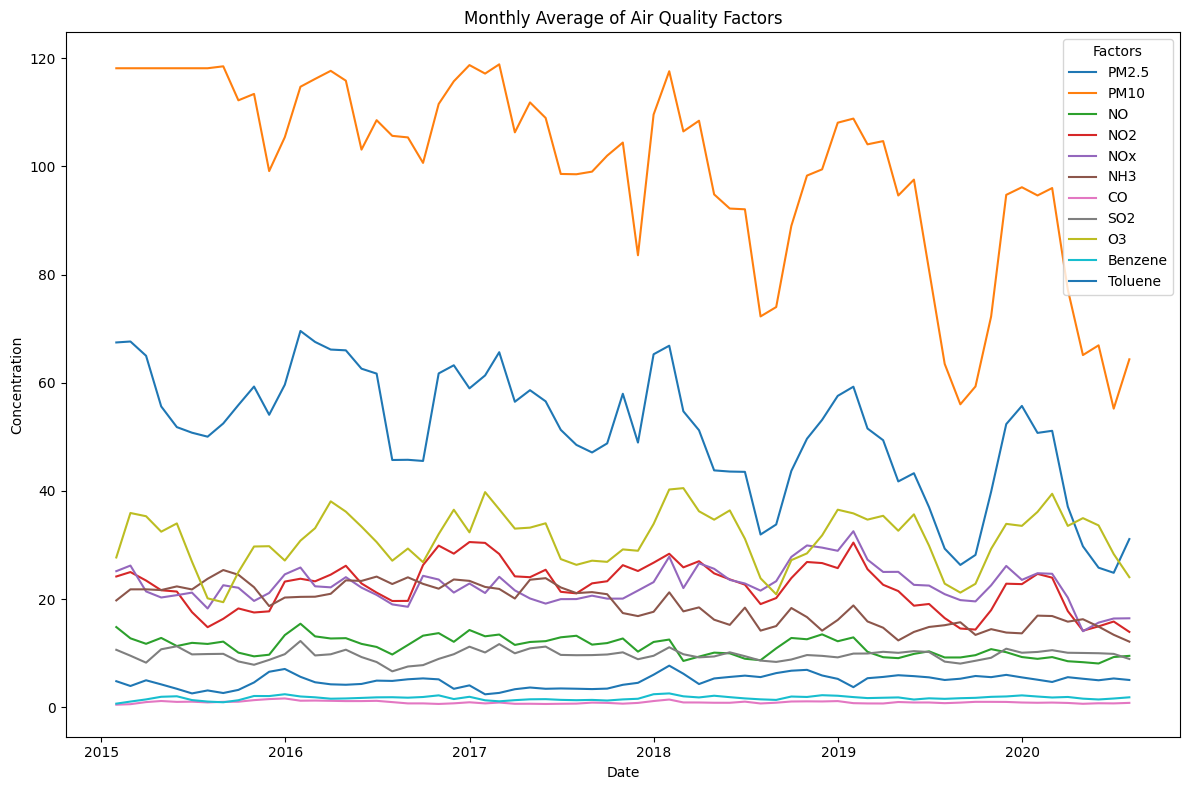

In [23]:
# 1.What are the monthly trends in the concentrations of various air quality factors over time?
factors = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

plt.figure(figsize=(12, 8))
for factor in factors:
    if factor in df.columns:
        monthly_avg = df[factor].resample('M').mean()
        plt.plot(monthly_avg, label=factor)

plt.title("Monthly Average of Air Quality Factors")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.legend(title="Factors")
plt.tight_layout()
plt.show()

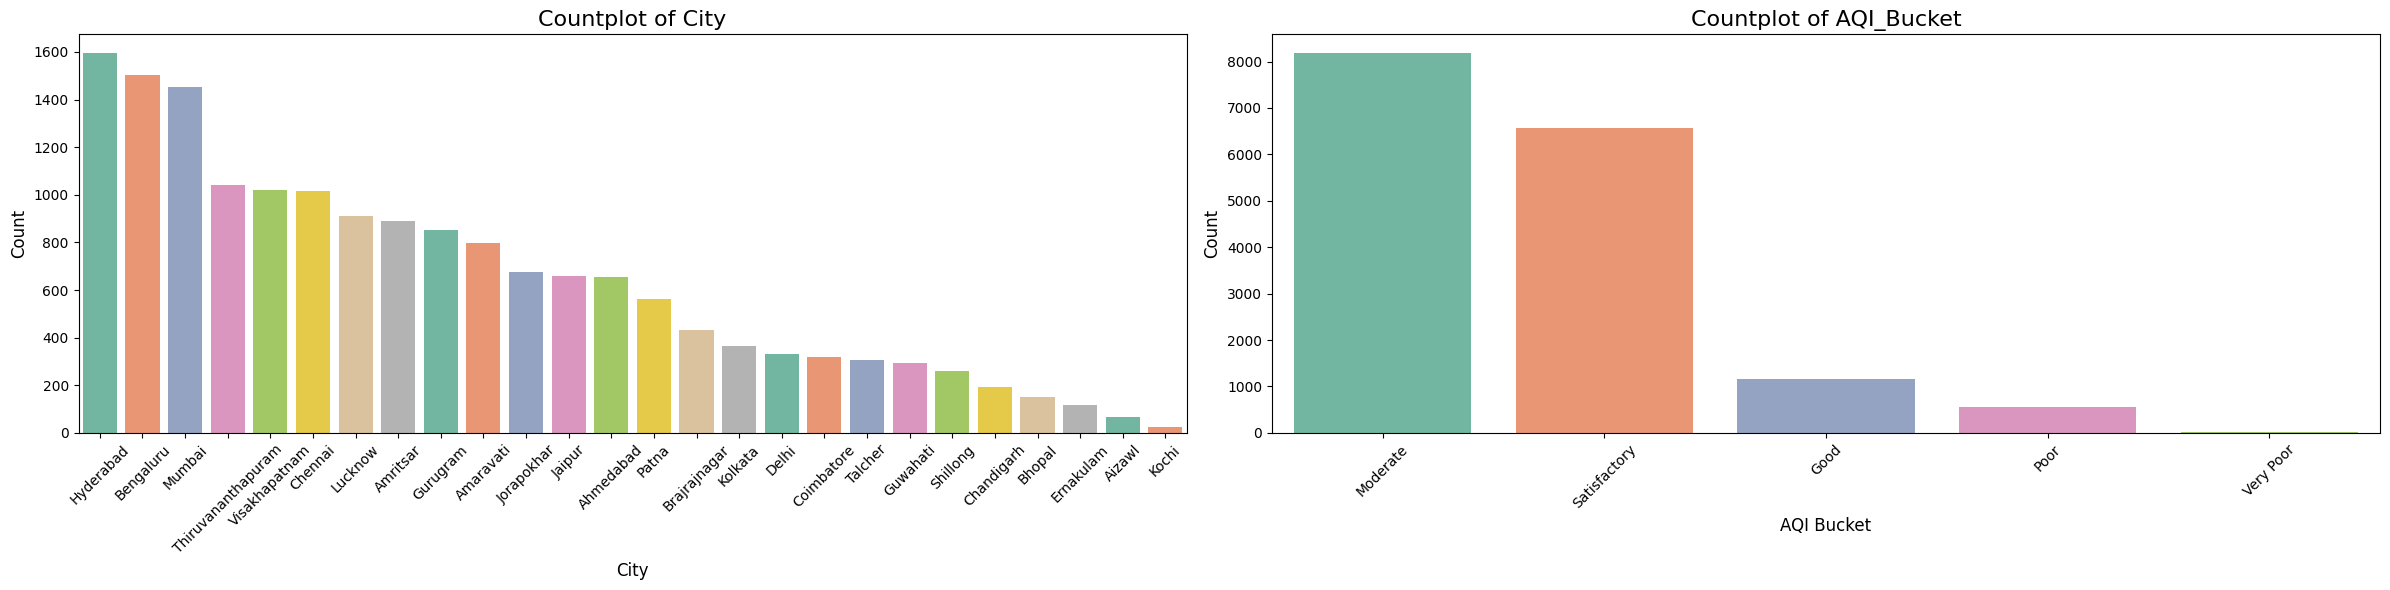

In [24]:
# 2.What is the distribution of cities and AQI categories in the dataset?
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='City', order=df['City'].value_counts().index, palette='Set2')
plt.title('Countplot of City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='AQI_Bucket', order=df['AQI_Bucket'].value_counts().index, palette='Set2')
plt.title('Countplot of AQI_Bucket', fontsize=16)
plt.xlabel('AQI Bucket', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


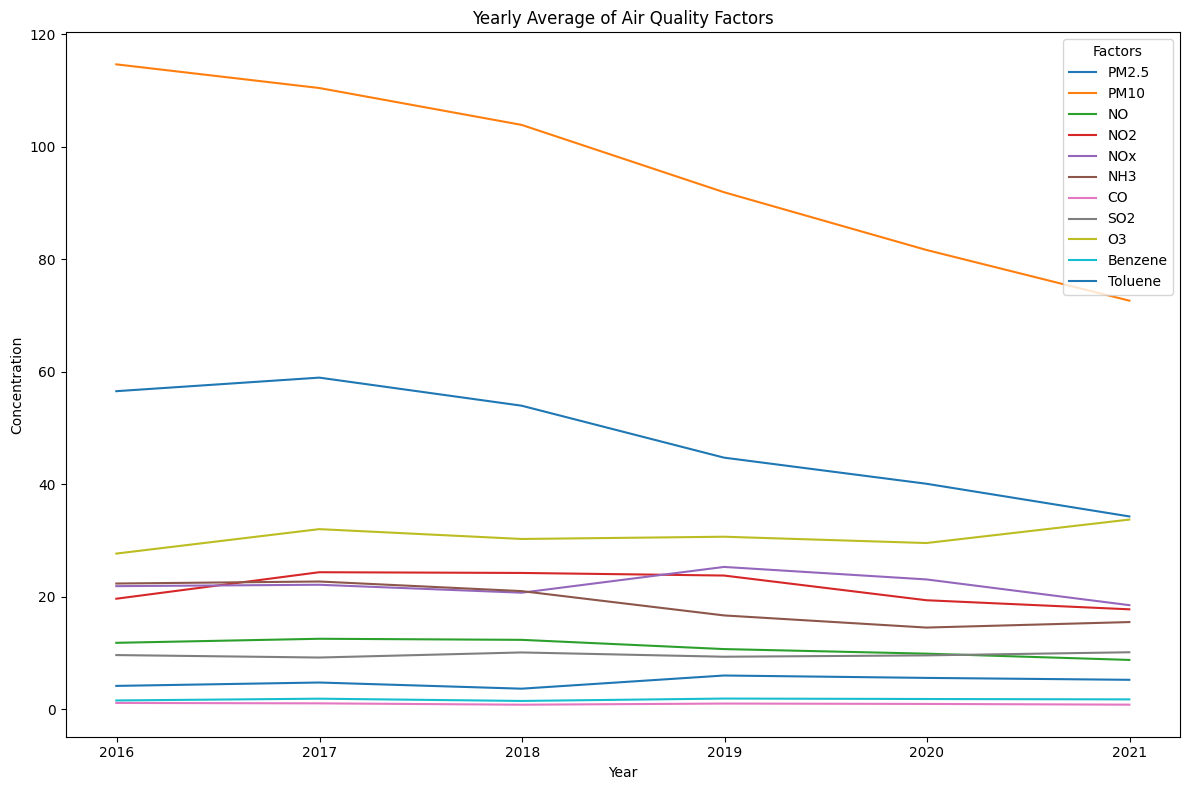

In [25]:
# 3.How do the yearly average concentrations of various air quality factors (such as PM2.5, PM10, NO, NO2, etc.) change over time?

factors = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

plt.figure(figsize=(12, 8))
for factor in factors:
    if factor in df.columns:
        yearly_avg = df[factor].resample('Y').mean()
        plt.plot(yearly_avg, label=factor)

plt.title("Yearly Average of Air Quality Factors")
plt.xlabel("Year")
plt.ylabel("Concentration")
plt.legend(title="Factors")
plt.tight_layout()
plt.show()

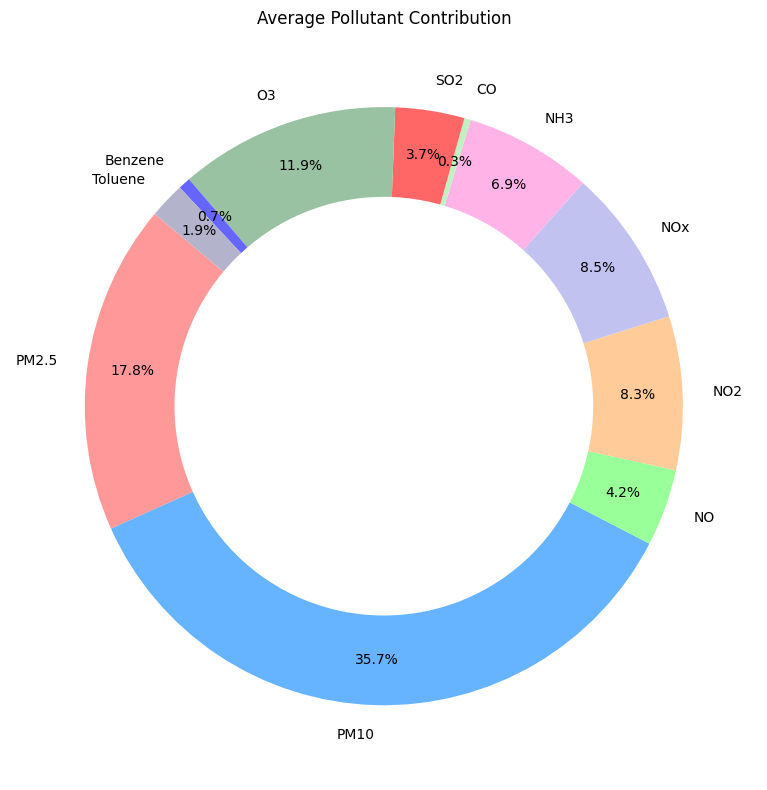

In [26]:
# 4.What is the proportional contribution of each air quality factor to the average pollutant concentrations?

factors = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
avg_concentration = df[factors].mean()


colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6',
          '#c2f0c2','#ff6666','#99c2a2','#6666ff','#b3b3cc']


plt.figure(figsize=(10, 8))
plt.pie(avg_concentration, labels=factors, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85)
plt.title("Average Pollutant Contribution")


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

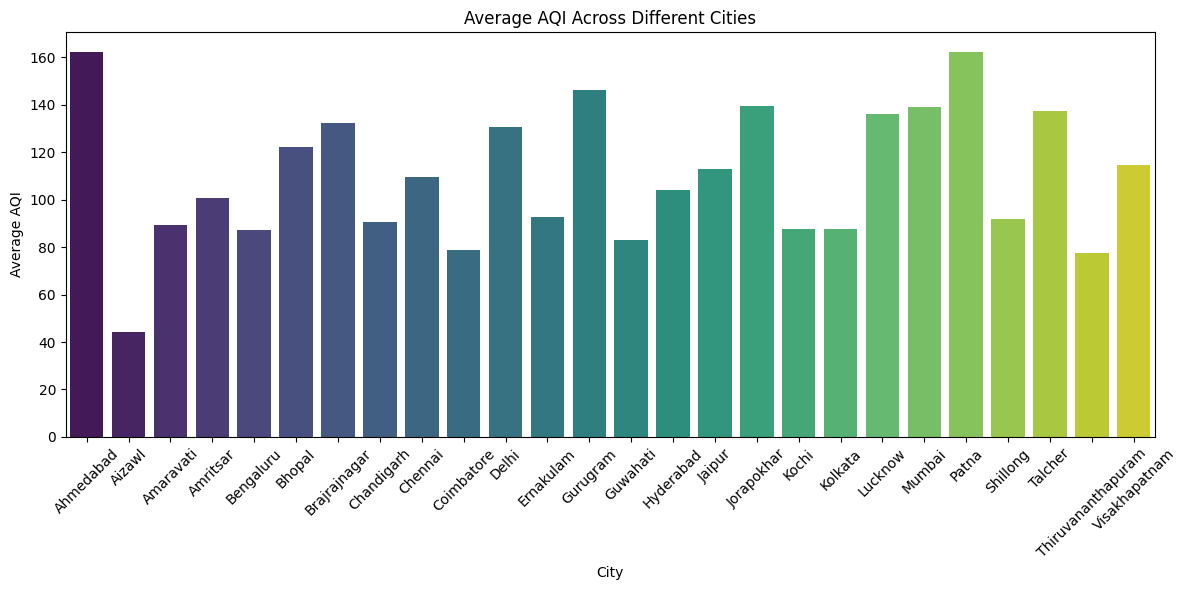

In [27]:

# 5. Average AQI across different cities
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='AQI', data=df, ci=None, estimator='mean', palette='viridis')
plt.title('Average AQI Across Different Cities')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

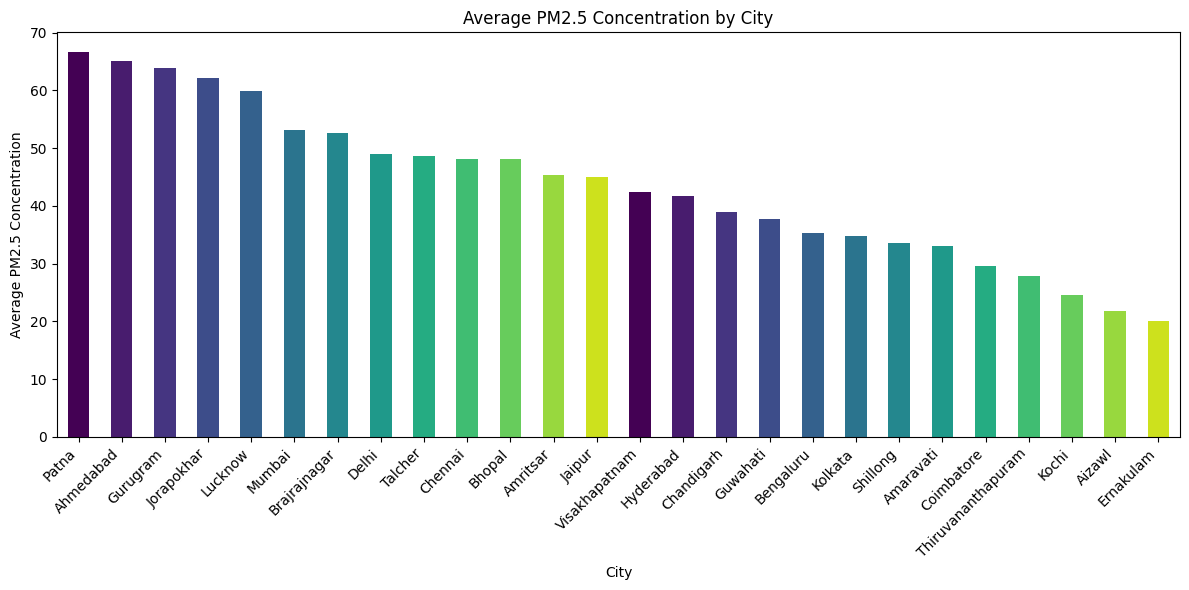

The city with the highest average PM2.5 concentration is: Patna


In [28]:
#6. Which city has the highest PM2.5 concentration?
plt.figure(figsize=(12, 6))
city_pm25_avg = df.groupby('City')['PM2.5'].mean()


cmap = plt.cm.viridis
colors = [cmap(i / len('city_pm25_avg')) for i in range(len('city_pm25_avg'))]

city_pm25_avg.sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Average PM2.5 Concentration by City')
plt.xlabel('City')
plt.ylabel('Average PM2.5 Concentration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

highest_pm25_city = city_pm25_avg.idxmax()
print(f"The city with the highest average PM2.5 concentration is: {highest_pm25_city}")

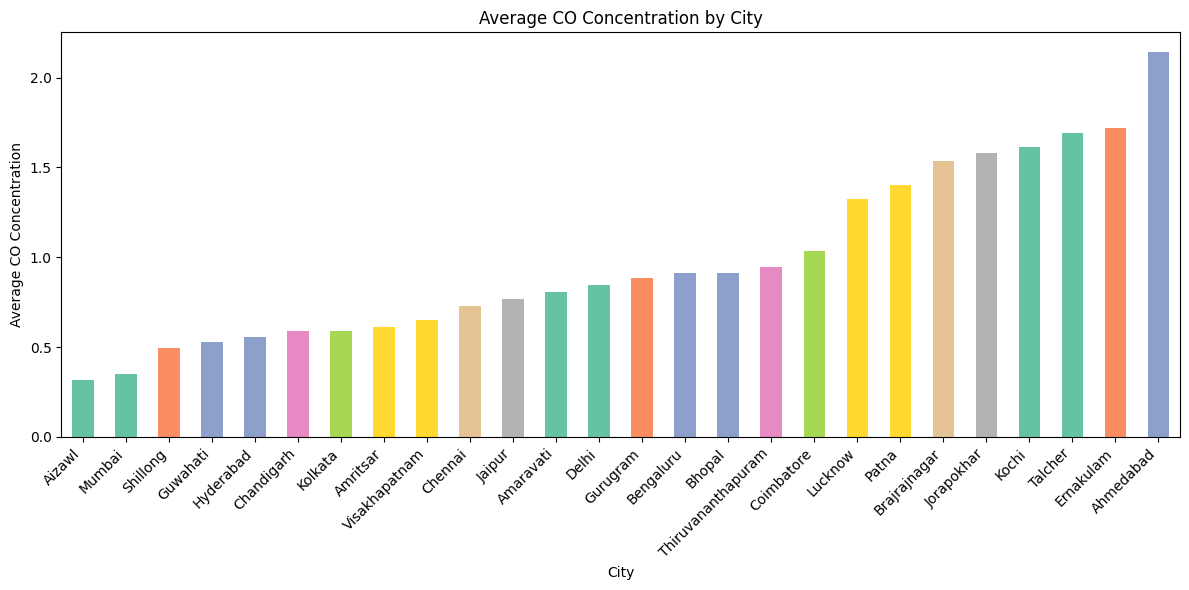

The city with the lowest average CO concentration is: Aizawl


In [29]:

# 7. Which city has the lowest levels of Carbon Monoxide (CO) (DRAW GRAPH)?

plt.figure(figsize=(12, 6))
city_co_avg = df.groupby('City')['CO'].mean()


cmap = plt.cm.Set2
colors = [cmap(i / len('city_co_avg')) for i in range(len('city_co_avg'))]

city_co_avg.sort_values().plot(kind='bar', color=colors)
plt.title('Average CO Concentration by City')
plt.xlabel('City')
plt.ylabel('Average CO Concentration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

lowest_co_city = city_co_avg.idxmin()
print(f"The city with the lowest average CO concentration is: {lowest_co_city}")

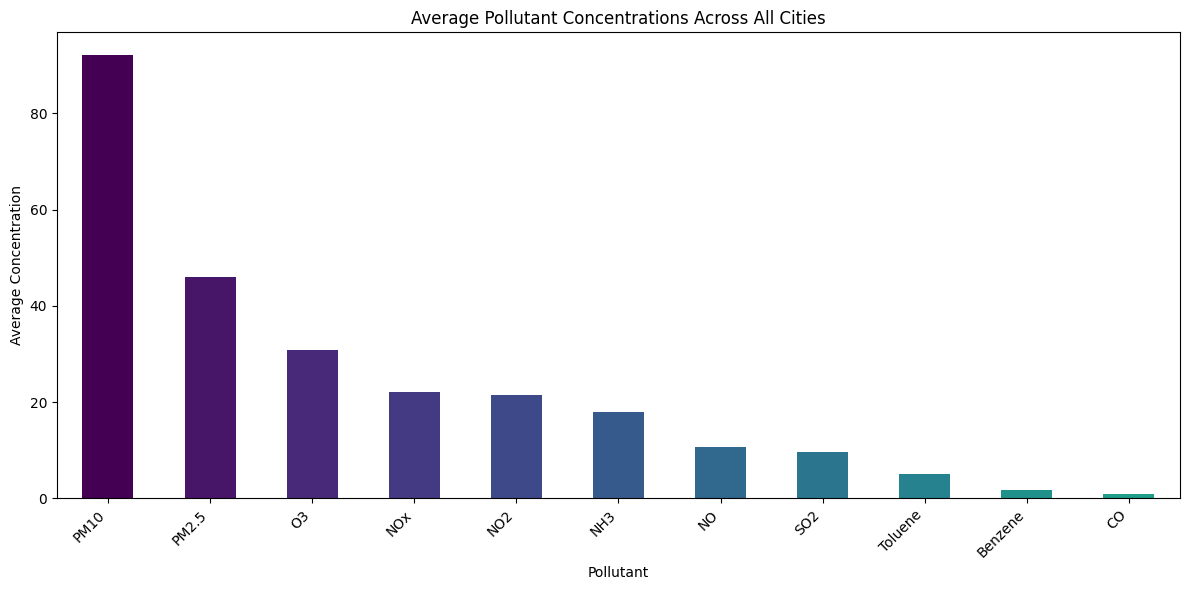

The pollutant with the highest average concentration across all cities is: PM10


In [30]:

# 8. Which pollutant (PM2.5, PM10, NO, NO2, etc.) has the highest concentration across all cities?

pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
avg_concentrations = df[pollutants].mean()

plt.figure(figsize=(12, 6))

cmap = plt.cm.viridis
colors = [cmap(i / len('avg_concentrations')) for i in range(len('avg_concentrations'))]

avg_concentrations.sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Average Pollutant Concentrations Across All Cities')
plt.xlabel('Pollutant')
plt.ylabel('Average Concentration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

highest_concentration_pollutant = avg_concentrations.idxmax()
print(f"The pollutant with the highest average concentration across all cities is: {highest_concentration_pollutant}")